In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
from keras import models, layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [21]:
# Load the CIFAR -10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [22]:
train_images.shape

(50000, 32, 32, 3)

In [23]:
train_labels[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [24]:
test_images.shape

(10000, 32, 32, 3)

In [25]:
test_labels[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [26]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

In [27]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [28]:
train_images[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [29]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

In [30]:
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.001)')
plt.show()

Epoch 1/20
1245/1250 [============================>.] - ETA: 0s - loss: 1.7060 - accuracy: 0.3695

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Evaluate the model on the train and test data
train_loss, train_accuracy = cnn_model.evaluate(train_images, train_labels)
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

# Make predictions on the train and test data
train_predictions = cnn_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = cnn_model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate confusion matrix
train_confusion_mtx = confusion_matrix(train_labels, train_predicted_labels)
test_confusion_mtx = confusion_matrix(test_labels, test_predicted_labels)

# Calculate precision and recall
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
test_precision = precision_score(test_labels, test_predicted_labels, average='weighted')
test_recall = recall_score(test_labels, test_predicted_labels, average='weighted')

print("Train")
print("    Accuracy: {:.2f}%".format(train_accuracy * 100))
print("    Precision: {:.2f}".format(train_precision))
print("    Recall: {:.2f}".format(train_recall))
print("    Confusion Matrix:")
print(train_confusion_mtx)
print()

print("Test")
print("    Accuracy: {:.2f}%".format(test_accuracy * 100))
print("    Precision: {:.2f}".format(test_precision))
print("    Recall: {:.2f}".format(test_recall))
print("    Confusion Matrix:")
print(test_confusion_mtx)

313/313 [==============================] - 2s 5ms/step
Train
    Accuracy: 71.60%
    Precision: 0.72
    Recall: 0.72
    Confusion Matrix:
[[3413  178  287   94   75   25   39   35  545  309]
 [  41 4228   33   20    5    4   33   14  101  521]
 [ 252   66 3028  293  325  265  440  123  117   91]
 [  57   71  351 2889  168  673  406  135  114  136]
 [  98   42  318  370 3052   73  483  419   63   82]
 [  14   38  323 1176  193 2687  208  234   49   78]
 [  10   54  181  252   79   96 4217   21   38   52]
 [  30   48  155  272  210  268   43 3761   26  187]
 [ 187  209   52   33   22    9   36    7 4223  222]
 [  58  428   21   45    3   10   23   30   78 4304]]

Test
    Accuracy: 65.70%
    Precision: 0.66
    Recall: 0.66
    Confusion Matrix:
[[628  34  75  27  13   4  11  11 129  68]
 [  9 790   7  10   1   3  10   2  27 141]
 [ 54  19 508  82  96  59 104  26  28  24]
 [  9  19  84 509  51 134  82  43  29  40]
 [ 19   6  93  97 516  24 119  97  20   9]
 [  9   9  78 245  44 487  

Epoch 1/20
1250/1250 [==============================] - 25s 19ms/step - loss: 2.0111 - accuracy: 0.2648 - val_loss: 1.7418 - val_accuracy: 0.3908
Epoch 2/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.7131 - accuracy: 0.3756 - val_loss: 1.5868 - val_accuracy: 0.4437
Epoch 3/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6019 - accuracy: 0.4144 - val_loss: 1.5111 - val_accuracy: 0.4647
Epoch 4/20
1250/1250 [==============================] - 21s 16ms/step - loss: 1.5357 - accuracy: 0.4420 - val_loss: 1.4556 - val_accuracy: 0.4858
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.4901 - accuracy: 0.4600 - val_loss: 1.4252 - val_accuracy: 0.5008
Epoch 6/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.4532 - accuracy: 0.4759 - val_loss: 1.4047 - val_accuracy: 0.5056
Epoch 7/20
1250/1250 [==============================] - 21s 16ms/step - loss: 1.4246 - accuracy: 0.4883 - val_loss: 1.3573 -

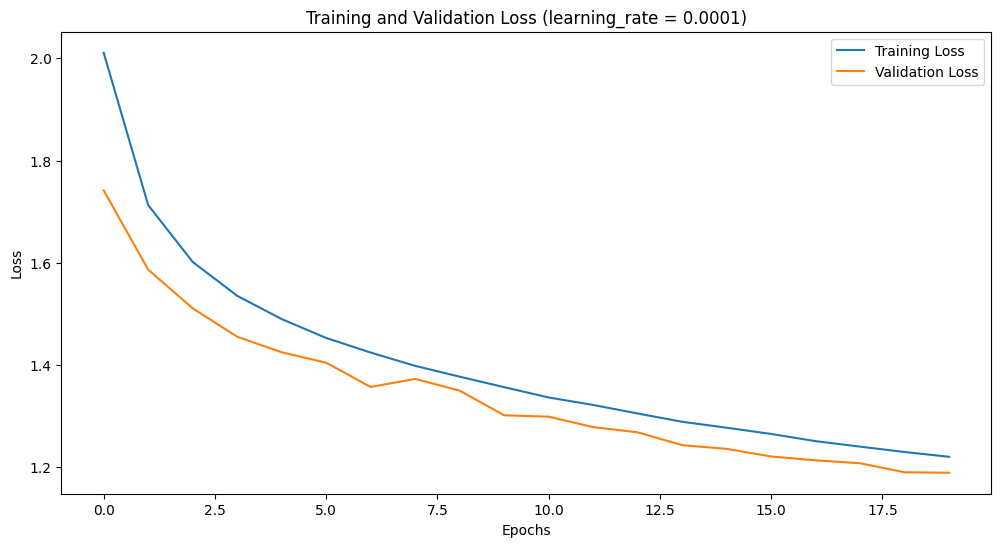

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.0001)')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Evaluate the model on the train and test data
train_loss, train_accuracy = cnn_model.evaluate(train_images, train_labels)
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

# Make predictions on the train and test data
train_predictions = cnn_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = cnn_model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate confusion matrix
train_confusion_mtx = confusion_matrix(train_labels, train_predicted_labels)
test_confusion_mtx = confusion_matrix(test_labels, test_predicted_labels)

# Calculate precision and recall
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
test_precision = precision_score(test_labels, test_predicted_labels, average='weighted')
test_recall = recall_score(test_labels, test_predicted_labels, average='weighted')

print("Train")
print("    Accuracy: {:.2f}%".format(train_accuracy * 100))
print("    Precision: {:.2f}".format(train_precision))
print("    Recall: {:.2f}".format(train_recall))
print("    Confusion Matrix:")
print(train_confusion_mtx)
print()

print("Test")
print("    Accuracy: {:.2f}%".format(test_accuracy * 100))
print("    Precision: {:.2f}".format(test_precision))
print("    Recall: {:.2f}".format(test_recall))
print("    Confusion Matrix:")
print(test_confusion_mtx)

313/313 [==============================] - 1s 4ms/step
Train
    Accuracy: 59.81%
    Precision: 0.59
    Recall: 0.60
    Confusion Matrix:
[[3225  264  182   64   73   38   53   51  779  271]
 [ 136 3880   13   24   28   16   79   23  311  490]
 [ 581  128 1825  337  693  427  523  172  195  119]
 [ 138  111  307 1847  338  943  717  188  162  249]
 [ 268   94  374  284 2651  188  562  383   98   98]
 [  68   66  306  963  349 2399  326  310   72  141]
 [  38  129  216  230  301   79 3793   35   71  108]
 [  92   92  109  213  484  380  118 3146   69  297]
 [ 447  291   55   30   24   36   47   11 3828  231]
 [ 188  926   30   43   21   37  116   64  264 3311]]

Test
    Accuracy: 58.79%
    Precision: 0.58
    Recall: 0.59
    Confusion Matrix:
[[644  46  38  13  12   7  16   8 164  52]
 [ 28 746   3   3   5   4  12   6  63 130]
 [ 96  21 366  67 136  93 118  37  38  28]
 [ 31  28  59 362  88 175 135  42  35  45]
 [ 50  17  75  57 500  51 130  88  19  13]
 [ 19  14  64 159  69 489  

Epoch 1/20
1250/1250 [==============================] - 21s 16ms/step - loss: 2.3044 - accuracy: 0.1004 - val_loss: 2.3037 - val_accuracy: 0.0977
Epoch 2/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3040 - accuracy: 0.0994 - val_loss: 2.3037 - val_accuracy: 0.1003
Epoch 3/20
1250/1250 [==============================] - 22s 18ms/step - loss: 2.3042 - accuracy: 0.0998 - val_loss: 2.3037 - val_accuracy: 0.0980
Epoch 4/20
1250/1250 [==============================] - 22s 18ms/step - loss: 2.3040 - accuracy: 0.0992 - val_loss: 2.3050 - val_accuracy: 0.1014
Epoch 5/20
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3042 - accuracy: 0.0968 - val_loss: 2.3035 - val_accuracy: 0.1025
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3039 - accuracy: 0.1018 - val_loss: 2.3048 - val_accuracy: 0.0952
Epoch 7/20
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3039 - accuracy: 0.1007 - val_loss: 2.3033 -

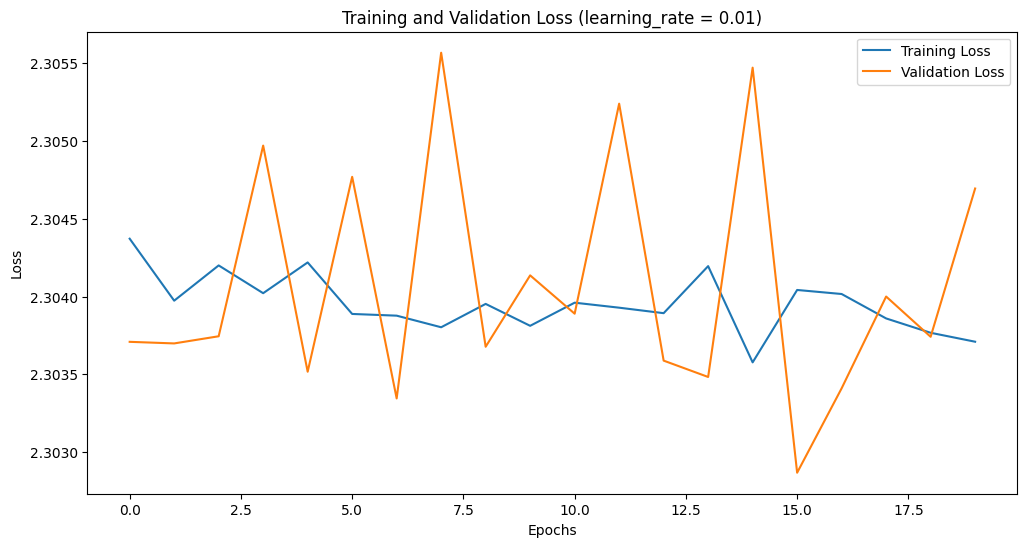

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.01)')
plt.show()

Epoch 1/20
1250/1250 [==============================] - 22s 17ms/step - loss: 3.3531 - accuracy: 0.1006 - val_loss: 2.3220 - val_accuracy: 0.1014
Epoch 2/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3157 - accuracy: 0.1005 - val_loss: 2.3075 - val_accuracy: 0.1025
Epoch 3/20
1250/1250 [==============================] - 21s 16ms/step - loss: 2.3146 - accuracy: 0.0995 - val_loss: 2.3180 - val_accuracy: 0.0977
Epoch 4/20
1250/1250 [==============================] - 21s 16ms/step - loss: 2.3164 - accuracy: 0.1002 - val_loss: 2.3141 - val_accuracy: 0.0997
Epoch 5/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3149 - accuracy: 0.1011 - val_loss: 2.3294 - val_accuracy: 0.0952
Epoch 6/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3159 - accuracy: 0.0985 - val_loss: 2.3198 - val_accuracy: 0.0997
Epoch 7/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3159 - accuracy: 0.0972 - val_loss: 2.3207 -

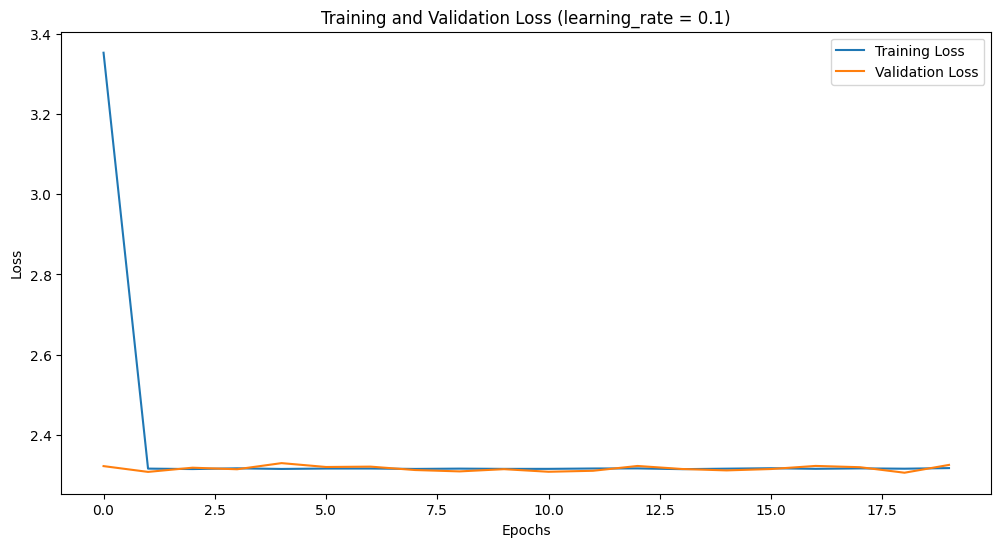

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.1)')
plt.show()

# Using DenseNet and VGG

In [ ]:
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
train_labels_encoded = to_categorical(train_labels, num_classes=10)
test_labels_encoded = to_categorical(test_labels, num_classes=10)

In [42]:
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = densenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
densenet_model = Model(inputs=densenet_base.input, outputs=predictions)

for layer in densenet_base.layers:
    layer.trainable = False

densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
densenet_checkpoint = ModelCheckpoint('densenet_fine_tuned.h5', save_best_only=True)
densenet_history = densenet_model.fit(train_images, train_labels_encoded, epochs=10, validation_data=(test_images, test_labels_encoded), callbacks=[densenet_checkpoint])

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.2176 - accuracy: 0.5723

c:\Users\ladca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 158s 98ms/step - loss: 1.2176 - accuracy: 0.5723 - val_loss: 1.1092 - val_accuracy: 0.6143
Epoch 2/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.0194 - accuracy: 0.6411 - val_loss: 1.0743 - val_accuracy: 0.6270
Epoch 3/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.9409 - accuracy: 0.6681 - val_loss: 1.0146 - val_accuracy: 0.6490
Epoch 4/10
1563/1563 [==============================] - 151s 96ms/step - loss: 0.8767 - accuracy: 0.6894 - val_loss: 1.0477 - val_accuracy: 0.6438
Epoch 5/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.8113 - accuracy: 0.7132 - val_loss: 1.0337 - val_accuracy: 0.6504
Epoch 6/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.7594 - accuracy: 0.7285 - val_loss: 1.0490 - val_accuracy: 0.6452
Epoch 7/10
1563/1563 [==============================] - 137s 87ms/step - loss: 0.7065 - accuracy: 0.7486 - val_loss: 1.0753 - va

In [43]:
densenet_train_loss = densenet_history.history['loss']
densenet_val_loss = densenet_history.history['val_loss']

densenet_model.load_weights('densenet_fine_tuned.h5')
densenet_test_loss, densenet_test_acc = densenet_model.evaluate(test_images, test_labels_encoded)

print(f'DenseNet Test Accuracy: {densenet_test_acc}')

313/313 [==============================] - 24s 76ms/step - loss: 1.0146 - accuracy: 0.6490
DenseNet Test Accuracy: 0.6489999890327454


In [44]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=vgg_base.input, outputs=predictions)

for layer in vgg_base.layers:
    layer.trainable = False

vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
vgg_checkpoint = ModelCheckpoint('vgg_fine_tuned.h5', save_best_only=True)
vgg_history = vgg_model.fit(train_images, train_labels_encoded, epochs=10, validation_data=(test_images, test_labels_encoded), callbacks=[vgg_checkpoint])

Epoch 1/10
1563/1563 [==============================] - 313s 200ms/step - loss: 1.3407 - accuracy: 0.5330 - val_loss: 1.2339 - val_accuracy: 0.5632
Epoch 2/10
1563/1563 [==============================] - 307s 196ms/step - loss: 1.1677 - accuracy: 0.5923 - val_loss: 1.1912 - val_accuracy: 0.5804
Epoch 3/10
1563/1563 [==============================] - 312s 200ms/step - loss: 1.1041 - accuracy: 0.6138 - val_loss: 1.1521 - val_accuracy: 0.5952
Epoch 4/10
1563/1563 [==============================] - 313s 201ms/step - loss: 1.0571 - accuracy: 0.6277 - val_loss: 1.1340 - val_accuracy: 0.6003
Epoch 5/10
1563/1563 [==============================] - 307s 196ms/step - loss: 1.0162 - accuracy: 0.6410 - val_loss: 1.1288 - val_accuracy: 0.6062
Epoch 6/10
1563/1563 [==============================] - 309s 198ms/step - loss: 0.9789 - accuracy: 0.6571 - val_loss: 1.1465 - val_accuracy: 0.5969
Epoch 7/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.9465 - accuracy: 0.6671 - val_

In [45]:
vgg_train_loss = vgg_history.history['loss']
vgg_val_loss = vgg_history.history['val_loss']

vgg_model.load_weights('vgg_fine_tuned.h5')
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels_encoded)
print(f'VGG Test Accuracy: {vgg_test_acc}')

313/313 [==============================] - 52s 167ms/step - loss: 1.1094 - accuracy: 0.6226
VGG Test Accuracy: 0.6226000189781189
